# Neural Network From Scratch
## Louis Widi Anandaputra
followed Bert Gollnick's <a href = 'https://www.udemy.com/course/pytorch-ultimate'>Udemy Tutorial</a>

Will be trying to implement the type of neural net below with no hidden layer to classify heart attack using the sigmoid function
<img src = 'Overview.jpg'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from collections import Counter
%reload_ext autoreload
%autoreload 2
from neural_net import neural_net_scratch

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
X = np.array(df.drop(columns=['output']))
y = np.array(df['output'])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [85]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Checking if distribution of y is good
print("Train target distribution: ", Counter(y_train))
print("Test target distribution: ", Counter (y_test))

Train target distribution:  Counter({np.int64(1): 133, np.int64(0): 109})
Test target distribution:  Counter({np.int64(1): 32, np.int64(0): 29})


Distribution is pretty good

In [87]:
LR = 0.01
ITERATIONS = 1000

In [88]:
nn_model = neural_net_scratch(lr = LR,
                              X_train = X_train_scaled,
                              X_test = X_test_scaled,
                              y_train = y_train,
                              y_test = y_test)

In [89]:
nn_model.train(ITERATIONS = ITERATIONS)

'Done Training'

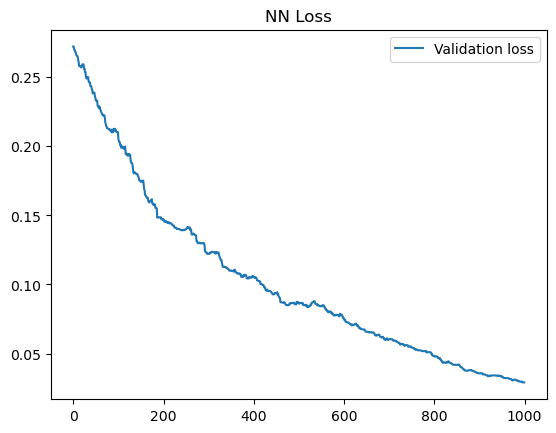

In [93]:
sns.lineplot(x =list(range(ITERATIONS)), 
             y = np.array(nn_model.L_test), 
             label='Validation loss')
plt.title('NN Loss')
plt.legend()

plt.show()

In [94]:
total = X_test_scaled.shape[0]
correct = 0
y_preds = []
for i in range(total):
    y_true = y_test[i]
    y_pred = np.round(nn_model.forward_pass(X_test_scaled[i]))
    y_preds.append(y_pred)
    correct += 1 if y_true == y_pred else 0
acc = correct / total
print("accuracy: ",acc)

accuracy:  0.7213114754098361


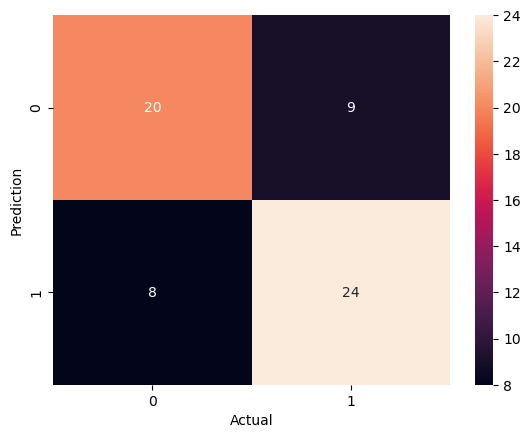

In [95]:
cf = confusion_matrix(y_true = y_test, y_pred = y_preds)
sns.heatmap(cf, annot=True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()